<a href="https://colab.research.google.com/github/parth06/Fake-News-Challenge/blob/master/3step_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/parth06/Fake-News-Challenge.git

Cloning into 'Fake-News-Challenge'...
remote: Enumerating objects: 240, done.
remote: Counting objects: 100% (240/240), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 240 (delta 121), reused 147 (delta 70), pack-reused 0
Receiving objects: 100% (240/240), 4.38 MiB | 16.73 MiB/s, done.
Resolving deltas: 100% (121/121), done.


In [2]:
cd Fake-News-Challenge/

/content/Fake-News-Challenge


In [3]:
!git submodule init
!git submodule update

Submodule 'fnc-1' (https://github.com/FakeNewsChallenge/fnc-1) registered for path 'fnc-1'
Cloning into '/content/Fake-News-Challenge/fnc-1'...
Submodule path 'fnc-1': checked out '29d473af2d15278f0464d5e41e4cbe7eb58231f2'


In [0]:
import nltk

In [5]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cosine,correlation

from feature_engineering import clean,get_tokenized_lemmas
from feature_engineering import word_overlap_features,refuting_features
from feature_engineering import polarity_features, hand_features, gen_or_load_feats 
from utils.generate_test_splits import kfold_split, get_stances_for_folds
from utils.score import report_score, LABELS, score_submission
from utils.system import parse_params, check_version

import tensorflow as tf
import tensorflow_hub as hub


In [7]:
!python3 generate_data.py

Reading dataset
Total stances: 49972
Total bodies: 1683
Reading dataset
Total stances: 25413
Total bodies: 904


In [0]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv") 

In [0]:
def clean_data(sent):
  sent = list(sent)
  data = list()
  for i in range(len(sent)):
    clean_sent = clean(sent[i])
    clean_sent = get_tokenized_lemmas(clean_sent)
    data.append(' '.join(clean_sent))
  return data

train["Headline"] = clean_data(train["Headline"])
train["Body"] = clean_data(train["Body"])

test["Headline"] = clean_data(test["Headline"])
test["Body"] = clean_data(test["Body"])

In [0]:
Xtrain, Xval, Ytrain, Yval = train_test_split(
    train[["Headline","Body","Relatedness","Discussion","AgreeNotagree"]],
    train["Stance"],test_size=0.1,stratify=train["Stance"],random_state=0)

In [11]:
related_df = Xtrain.drop(['Discussion','AgreeNotagree'],axis=1)
print(related_df.shape)
print(related_df["Relatedness"].value_counts())

discuss_df = Xtrain[Xtrain["Discussion"].notnull()].drop(['Relatedness','AgreeNotagree'],axis=1)
print(discuss_df.shape)
print(discuss_df["Discussion"].value_counts())

aga_df = Xtrain[Xtrain["AgreeNotagree"].notnull()].drop(['Relatedness','Discussion'],axis=1)
print(aga_df.shape)
print(aga_df["AgreeNotagree"].value_counts())

(44974, 3)
unrelated    32890
related      12084
Name: Relatedness, dtype: int64
(12084, 3)
discuss    8018
ANA        4066
Name: Discussion, dtype: int64
(4066, 3)
agree       3310
disagree     756
Name: AgreeNotagree, dtype: int64


In [0]:
# !mkdir data/fasttext

# !wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip

# !unzip wiki-news-300d-1M.vec.zip -d data/fasttext


In [0]:
# !mkdir data/glove_twitter
# !wget http://nlp.stanford.edu/data/glove.twitter.27B.zip
# !unzip glove.twitter.27B.zip -d data/glove_twitter/

# glove_input_file = './data/glove_twitter/glove.twitter.27B.50d.txt'

In [0]:
# from gensim.test.utils import datapath, get_tmpfile
# from gensim.models import KeyedVectors
# from gensim.scripts.glove2word2vec import glove2word2vec

# # tmp_file = get_tmpfile("test_word2vec.txt")
# # _ = glove2word2vec(glove_input_file, tmp_file)

# model = KeyedVectors.load_word2vec_format(tmp_file)
# # #Creating the model
# # model = KeyedVectors.load_word2vec_format('data/fasttext/wiki-news-300d-1M.vec')

In [0]:
# from nltk import word_tokenize
# head_tokens = list()
# body_tokens = list()
# for i in range(len(train["Headline"])):
#   head_tokens.extend(word_tokenize(train["Headline"][i]))
#   body_tokens.extend(word_tokenize(train["Body"][i]))

# vocab = sorted(set(head_tokens+body_tokens))

In [0]:
# EMBEDDING_DIM=100
# embeddings_matrix = np.random.uniform(-0.05, 0.05, size=(len(vocab)+1, EMBEDDING_DIM)) # +1 is because the matrix indices start with 0
# for i in range(len(vocab)): # i=0 is the embedding for the zero padding
#   try:
#       embeddings_vector = model[vocab[i]]
#   except KeyError:
#       embeddings_vector = None
#   if embeddings_vector is not None:
#       embeddings_matrix[i] = embeddings_vector

# del model
  

In [0]:
# #Glove and Fasttext

# def get_embeddings(sent):
#   emb = list()
  
#   for i in range(len(sent)):
#     sent_emb = list()
#     for j in range(len(sent[i])):
#       try:
#         embeddings_vector = model[sent[i][j]]
#       except KeyError:
#           embeddings_vector = None
#       if embeddings_vector is not None:
#           sent_emb.append(np.array(embeddings_vector))
#     if sent_emb == []:
#       emb.append([0]*100)
#     else:
#       emb.append(list(np.mean(np.array(sent_emb),axis=0)))

#   return emb

In [0]:
def get_embeddings(sent):
  #https://tfhub.dev/google/nnlm-en-dim128/1
  embed = hub.Module("https://tfhub.dev/google/nnlm-en-dim128/1")
  
  tf.logging.set_verbosity(tf.logging.ERROR)
  messages = list()
  for i in range(len(sent)):
    clean_sent = clean(sent[i])
    clean_sent = get_tokenized_lemmas(clean_sent)
    messages.append(' '.join(clean_sent))
  emb = list()
  
  with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    message_embeddings = session.run(embed(messages))

    for j, message_embedding in enumerate(np.array(message_embeddings).tolist()):
      emb.append(message_embedding)
  
  return emb



In [0]:
def generate_features(h,b,name):
    h,b = list(h),list(b)
    X_overlap = gen_or_load_feats(word_overlap_features, h, b, "features/overlap."+name+".npy")
    X_refuting = gen_or_load_feats(refuting_features, h, b, "features/refuting."+name+".npy")
    X_polarity = gen_or_load_feats(polarity_features, h, b, "features/polarity."+name+".npy")
    X_hand = gen_or_load_feats(hand_features, h, b, "features/hand."+name+".npy")
    X_head_embedding = get_embeddings(h)
    X_body_embedding = get_embeddings(b)
    X_co = list()
    for i in range(len(h)):
      X_co.append(cosine(X_head_embedding[i],X_body_embedding[i]))
    X = np.c_[X_hand, X_polarity, X_refuting, X_overlap, X_head_embedding, X_body_embedding, X_co]
    
    return X

In [0]:
import xgboost as xgb

def classifier(trainX, trainY):

    X_train, X_val, y_train, y_val = train_test_split(trainX, trainY, test_size=0.10, random_state=7, stratify=trainY)
    xg_train = xgb.DMatrix(X_train, label=y_train)
    xg_val = xgb.DMatrix(X_val, label=y_val)
    evals = [(xg_train,'train'),(xg_val, 'validation')]

#     xg_train = xgb.DMatrix(trainX, label = trainY)
    
    # setup parameters for xgboost
    param = {}
    # use softmax multi-class classification
    param['objective'] = 'binary:logistic'
    # scale weight of positive examples
    param['eta'] = 0.1
    param['max_depth'] = 6
    param['verbosity'] = 1
    param['nthread'] = 20

    num_round = 300
    clf = xgb.train(param, xg_train, num_round, evals = evals, verbose_eval=50);
#     cv = xgb.cv(param, xg_train,  num_round, nfold = 10,stratified=True, verbose_eval=100)

    return clf

In [20]:
relatedTrainX = generate_features(related_df["Headline"],related_df["Body"],"related")
relatedTrainY = [int(stance == 'unrelated') for stance in related_df["Relatedness"]]


44974it [03:52, 193.82it/s]
44974it [00:11, 3768.84it/s]
44974it [03:44, 199.94it/s]
44974it [02:50, 263.29it/s]


In [21]:
relatedness_classifier = classifier(relatedTrainX, relatedTrainY)

[0]	train-error:0.046966	validation-error:0.052912
[50]	train-error:0.01344	validation-error:0.023788
[100]	train-error:0.002248	validation-error:0.013117
[150]	train-error:0.000124	validation-error:0.010227
[200]	train-error:0	validation-error:0.009337
[250]	train-error:0	validation-error:0.008893
[299]	train-error:0	validation-error:0.009115


In [22]:
discTrainX =  generate_features(discuss_df["Headline"],discuss_df["Body"],"discuss")
discTrainY = [int(stance == 'discuss') for stance in discuss_df["Discussion"]]


12084it [01:02, 193.06it/s]
12084it [00:03, 3839.53it/s]
12084it [01:10, 171.20it/s]
12084it [00:47, 252.15it/s]


In [23]:
disussion_classifier =   classifier(discTrainX, discTrainY)

[0]	train-error:0.173701	validation-error:0.187758
[50]	train-error:0.027402	validation-error:0.075269
[100]	train-error:0.006345	validation-error:0.043838
[150]	train-error:0.001655	validation-error:0.028122
[200]	train-error:0.000276	validation-error:0.019024
[250]	train-error:0.000184	validation-error:0.01737
[299]	train-error:0.000184	validation-error:0.01737


In [24]:
agaTrainX = generate_features(aga_df["Headline"],aga_df["Body"],"aga")
agaTrainY = [int(stance == 'agree') for stance in aga_df["AgreeNotagree"]]

4066it [00:20, 200.42it/s]
4066it [00:01, 3621.87it/s]
4066it [00:20, 199.21it/s]
4066it [00:14, 277.20it/s]


In [25]:
aga_classifier =  classifier(agaTrainX, agaTrainY)


[0]	train-error:0.097841	validation-error:0.142506
[50]	train-error:0.005739	validation-error:0.088452
[100]	train-error:0	validation-error:0.063882
[150]	train-error:0	validation-error:0.068796
[200]	train-error:0	validation-error:0.066339
[250]	train-error:0	validation-error:0.058968
[299]	train-error:0	validation-error:0.061425


In [0]:
# Uncomment to view the classifier tree
# from xgboost import plot_tree
# import matplotlib.pyplot as plt

# plot_tree(disussion_classifier,num_trees=1)
# fig = plt.gcf()
# fig.set_size_inches(180.5, 100.5)
# plt.show()

In [0]:
# Confusion Matrix Function
# https://gist.github.com/hitvoice/36cf44689065ca9b927431546381a3f7
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#cm = confusion_matrix()

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm_perc, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax,cmap = sns.cm.rocket_r)
    #plt.savefig(filename)
    plt.show()



In [28]:
xf_val = generate_features(Xval["Headline"],Xval["Body"],"validation")
xg_val = xgb.DMatrix(xf_val)


4998it [00:26, 191.59it/s]
4998it [00:01, 3385.20it/s]
4998it [00:25, 197.52it/s]
4998it [00:18, 267.03it/s]


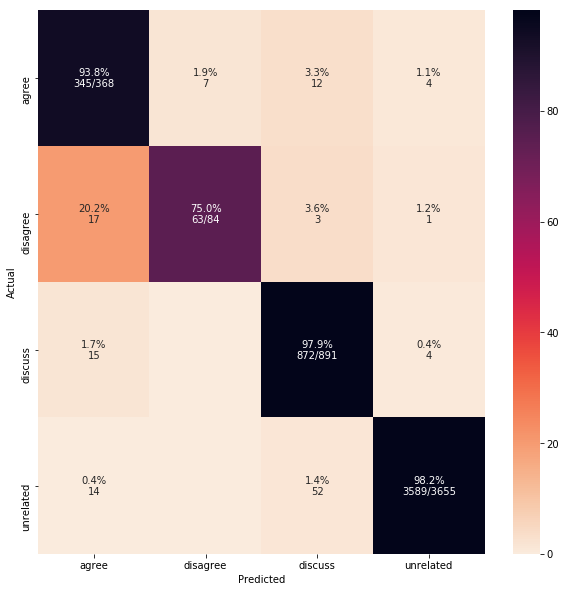

In [29]:
relatedness_pred = relatedness_classifier.predict(xg_val);
discussion_pred = disussion_classifier.predict(xg_val)
aga_pred = aga_classifier.predict(xg_val)

ret, scores = [], []
for (pred_relate, pred_discuss, pred_agree) in zip(relatedness_pred, discussion_pred, aga_pred):
    scores.append((pred_relate, pred_discuss, pred_agree))
    if pred_relate >= 0.9:
        ret.append('unrelated')
    elif pred_discuss >= 0.5:
        ret.append('discuss')
    elif pred_agree >= 0.5:
        ret.append('agree')
    else:
        ret.append('disagree')
        
cm_analysis(Yval,ret, ["agree","disagree","discuss","unrelated"])


In [30]:
confusion_matrix(Yval,ret)

array([[ 345,    7,   12,    4],
       [  17,   63,    3,    1],
       [  15,    0,  872,    4],
       [  14,    0,   52, 3589]])

In [31]:
report_score(Yval,ret)

-------------------------------------------------------------
|           |   agree   | disagree  |  discuss  | unrelated |
-------------------------------------------------------------
|   agree   |    345    |     7     |    12     |     4     |
-------------------------------------------------------------
| disagree  |    17     |    63     |     3     |     1     |
-------------------------------------------------------------
|  discuss  |    15     |     0     |    872    |     4     |
-------------------------------------------------------------
| unrelated |    14     |     0     |    52     |   3589    |
-------------------------------------------------------------
Score: 2190.75 out of 2256.75	(97.07544034562977%)


97.07544034562977

In [32]:
testX = generate_features(test["Headline"],test["Body"],"test")

25413it [02:04, 204.56it/s]
25413it [00:06, 3660.62it/s]
25413it [01:54, 222.14it/s]
25413it [01:29, 284.97it/s]


In [0]:
xg_test = xgb.DMatrix(testX)
relatedness_pred = relatedness_classifier.predict(xg_test);
discussion_pred = disussion_classifier.predict(xg_test)
aga_pred = aga_classifier.predict(xg_test)


In [0]:
ret, scores = [], []
for (pred_relate, pred_discuss, pred_agree) in zip(relatedness_pred, discussion_pred, aga_pred):
    scores.append((pred_relate, pred_discuss, pred_agree))
    if pred_relate >= 0.9:
        ret.append('unrelated')
    elif pred_discuss >= 0.5:
        ret.append('discuss')
    elif pred_agree >= 0.5:
        ret.append('agree')
    else:
        ret.append('disagree')

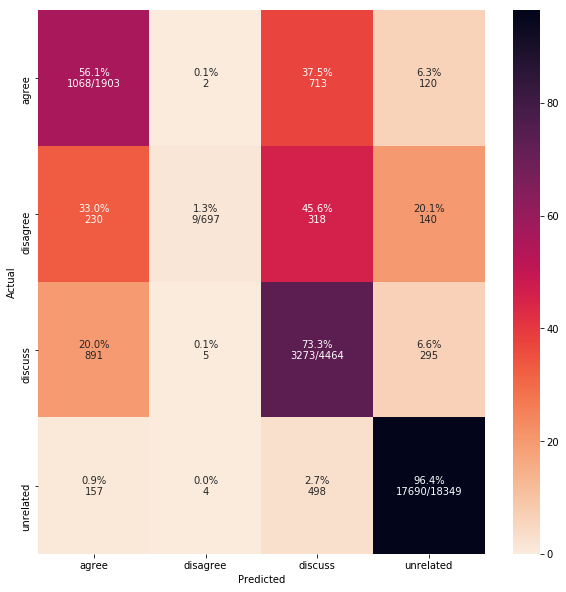

In [35]:
cm_analysis(list(test["Stance"]),ret, ["agree","disagree","discuss","unrelated"])

In [36]:
report_score(list(test["Stance"]),ret)

-------------------------------------------------------------
|           |   agree   | disagree  |  discuss  | unrelated |
-------------------------------------------------------------
|   agree   |   1068    |     2     |    713    |    120    |
-------------------------------------------------------------
| disagree  |    230    |     9     |    318    |    140    |
-------------------------------------------------------------
|  discuss  |    891    |     5     |   3273    |    295    |
-------------------------------------------------------------
| unrelated |    157    |     4     |    498    |   17690   |
-------------------------------------------------------------
Score: 9312.25 out of 11651.25	(79.92490076172085%)


79.92490076172085

In [37]:
confusion_matrix(list(test["Stance"]),ret)

array([[ 1068,     2,   713,   120],
       [  230,     9,   318,   140],
       [  891,     5,  3273,   295],
       [  157,     4,   498, 17690]])

In [0]:
submit = pd.read_csv("fnc-1/test_stances_unlabeled.csv")

In [39]:
submit["Stance"] = ret
submit.head()

,Headline,Body ID,Stance
0,Ferguson riots: Pregnant woman loses eye after...,2008,unrelated
1,Crazy Conservatives Are Sure a Gitmo Detainee ...,1550,unrelated
2,A Russian Guy Says His Justin Bieber Ringtone ...,2,unrelated
3,"Zombie Cat: Buried Kitty Believed Dead, Meows ...",1793,unrelated
4,Argentina's President Adopts Boy to End Werewo...,37,unrelated


In [0]:
submit.to_csv("submission.csv",index=False)